In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
conn=engine.connect()

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()


Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found

inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
#inspecting
columns=inspector.get_columns('measurement')
for column in columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# inspecting
columns=inspector.get_columns('station')
for column in columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Save references to each table
# mapped classes are now created with names by default
# matching that of the table name.
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB. Link Python to the database by creating a SQLAlchemy session.
session= Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)


('2017-08-23',)


In [12]:
# oldest
oldest = session.query(measurement.date).order_by(measurement.date.asc()).first()
print(oldest)

('2010-01-01',)


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_year_ago = dt.date(2017,8,23) - dt.timedelta(days=1*365)  
print(date_year_ago)

2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores
#Select only the "date" and "prcp" values.

precip_scores=session.query(measurement.date, measurement.prcp).\
filter(measurement.date>=date_year_ago)


In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(precip_scores)
df.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [16]:
newdf=df.set_index('date')
newdf

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [17]:
# Sort the dataframe by date
newdf2=newdf.sort_values(by=['date'])

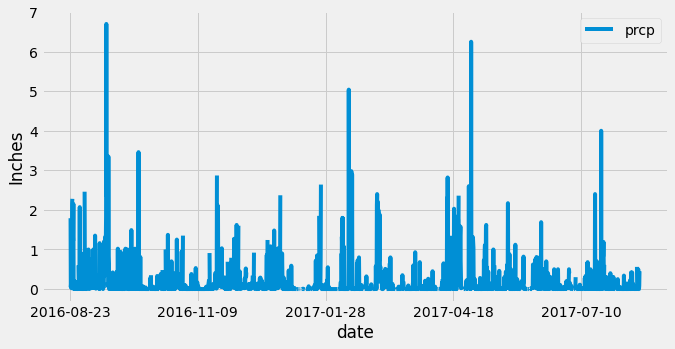

In [18]:
# Use Pandas Plotting with Matplotlib (pandas.DataFrame.plot) to plot the data
newdf2.plot(figsize = (10,5))
plt.ylabel('Inches')
newdf2
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
newdf2.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset

stations=session.query(station).count()
stations


9

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# Do this by Listing the stations and the counts in descending order.You’ll need to use the func.count function in your query.

active_stations=session.query(measurement.station,func.count(measurement.station)).\
                     group_by(measurement.station).\
                     order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)).\
             filter(measurement.station=="USC00519281").first()

('USC00519281', 54.0, 85.0, 71.66378066378067)

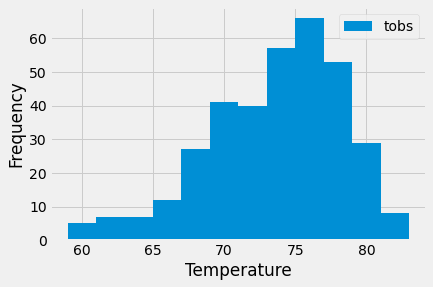

In [24]:
#Filter by the station that has the greatest number of observations.
#Query the previous 12 months of TOBS data for that station.
#Plot the results as a histogram with bins=12
active_stations=session.query(measurement.tobs).filter(measurement.station== "USC00519281").\
                              filter(measurement.date>= date_year_ago)

active_station_tobs_df=pd.DataFrame(active_stations)

active_station_tobs_df.plot(kind ='hist', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])

plt.show()
                                                    

# Close session

In [ ]:
# Close Session
session.close()

In [ ]:
#reference for In64 : https://stackoverflow.com/questions/58785200/how-do-i-determine-one-year-prior-to-a-given-date-2017-08-23-with-python-datetim